In [10]:
library(ggplot2)
library(dplyr)
library(zoo)

Warning message:
“package ‘zoo’ was built under R version 3.2.5”
Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [43]:
data <- read.csv("../../../io/data/train.csv")

In [51]:
df <- data %>%
    arrange(secs) %>%
    mutate(sensor = secs < 1e10,
          secs1 = ifelse(sensor, secs, NA), 
           secs1 = secs1 - min(secs1, na.rm = TRUE),
          secs2 = ifelse(sensor, NA, secs), 
           secs2 = secs2 - min(secs2, na.rm = TRUE),
          secs = ifelse(sensor, secs1, secs2 + max(secs1, na.rm = TRUE) + 1))
head(df)

s.barometer,s.co2,s.humidity,s.no2resistance,s.o3resistance,s.temperature.ambient,s.temperature.unit,secs,O3_Waarden,NO2_Waarden,CO_Waarden,sensor,secs1,secs2
991.89,0,58.799,28.021,17.206,8.250,21.750,0,43.86800,26.1240,NA,TRUE,0,NA
991.88,0,58.595,28.370,18.142,8.000,21.750,27,43.36500,26.2500,NA,TRUE,27,NA
991.87,0,58.802,30.075,17.584,8.000,21.750,55,42.73967,26.6980,NA,TRUE,55,NA
991.90,0,58.895,29.997,17.975,7.812,22.000,66,42.49400,26.8740,NA,TRUE,66,NA
991.92,0,58.507,32.053,18.553,7.687,21.875,77,42.30333,26.9375,NA,TRUE,77,NA
991.87,0,58.016,31.708,18.449,7.562,21.875,88,42.17867,26.8660,NA,TRUE,88,NA


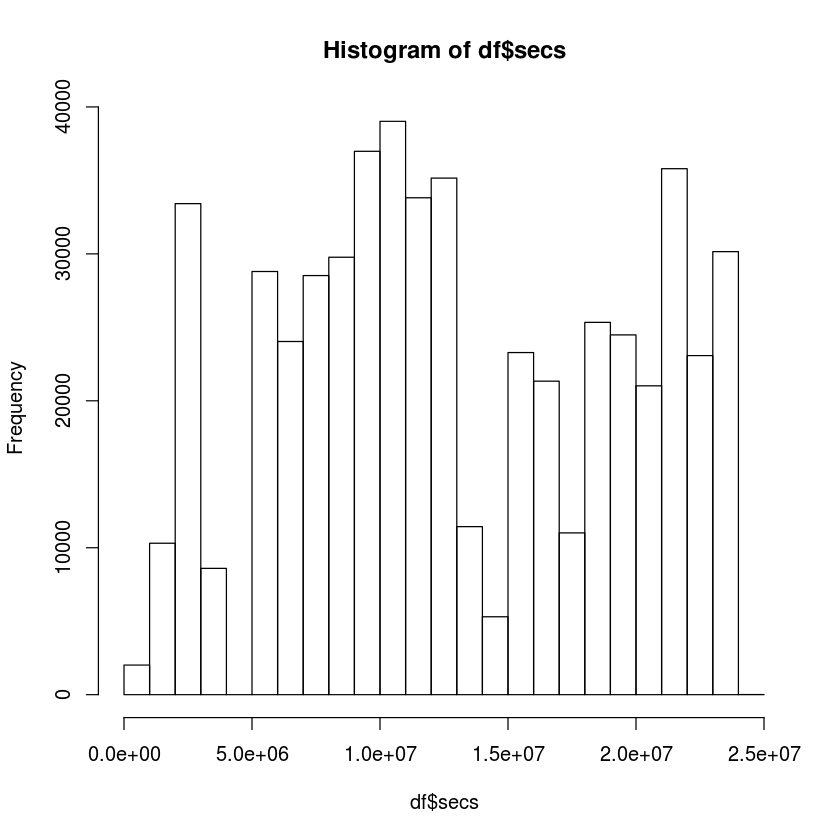

In [52]:
hist(df$secs)

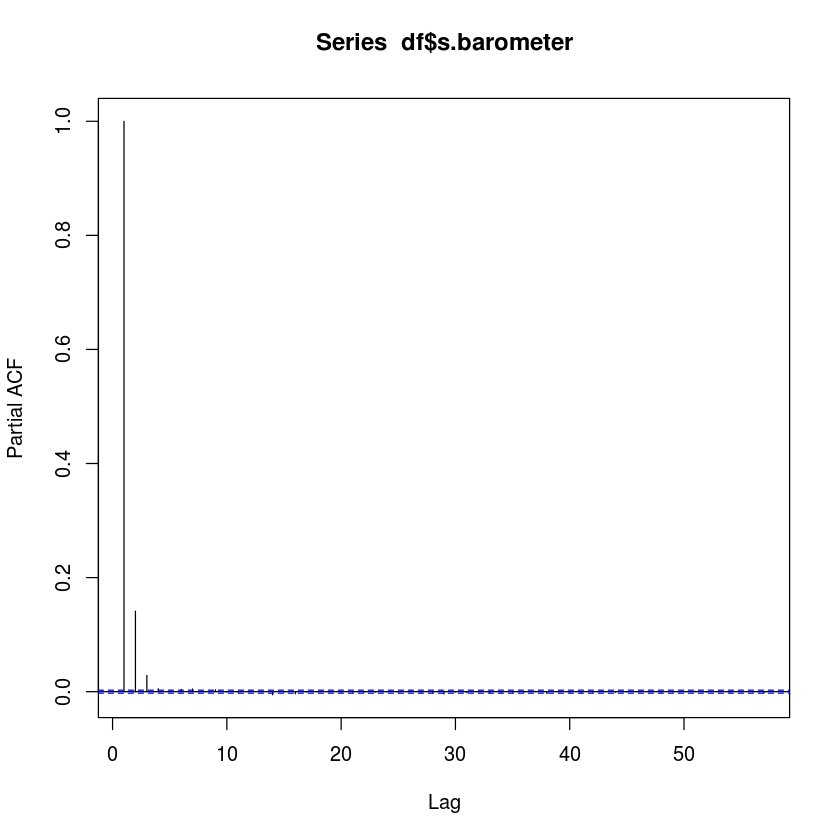

In [85]:
pacf(df$s.barometer)
# ggplot(df %>% filter(percent_rank(secs) < .01), aes(secs %% (24*60*60), s.barometer)) + 
#     geom_point(size = .1, alpha = .1)

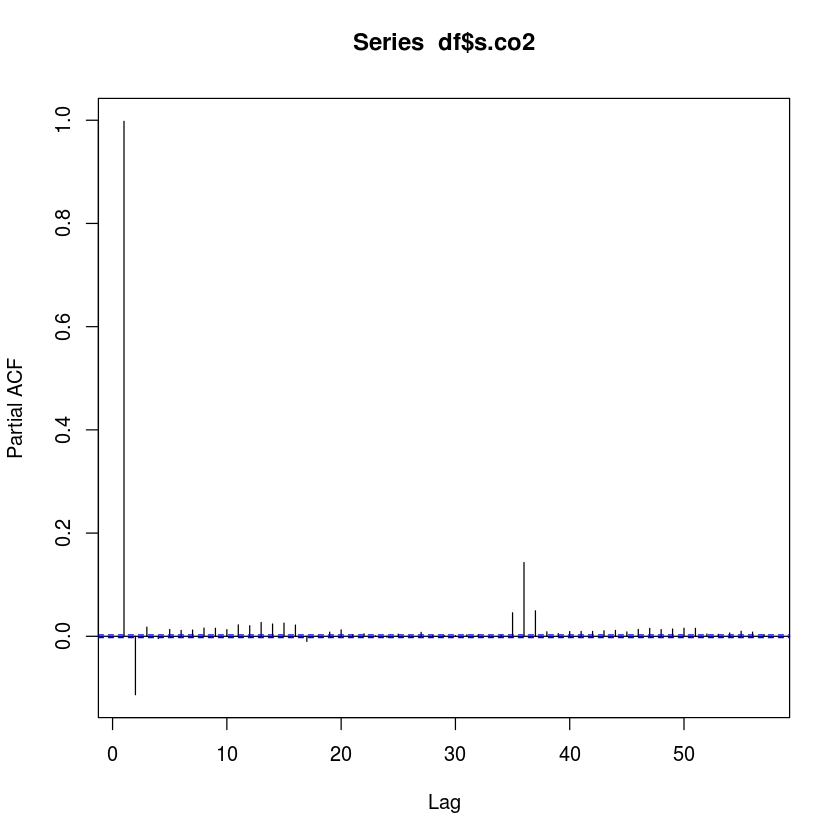

In [88]:
pacf(df$s.co2)
# ggplot(df %>% filter(percent_rank(secs) < 0.01), aes(secs %% (24 * 60 * 60), s.co2)) + 
#     geom_point(size = .1, alpha = .1)

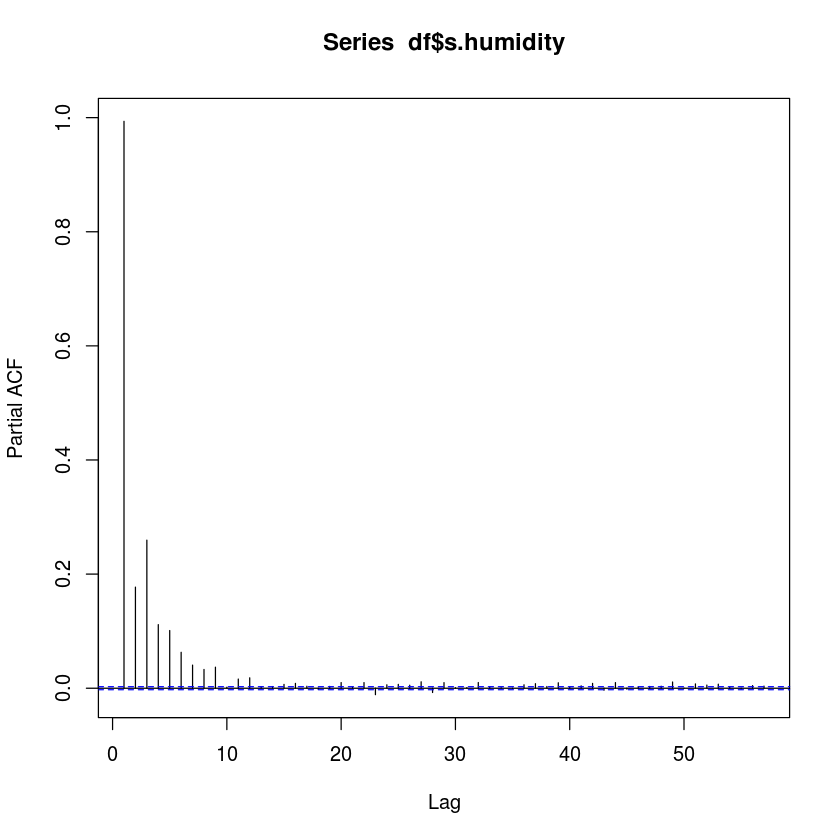

In [90]:
pacf(df$s.humidity)
# ggplot(df %>% filter(percent_rank(secs) < 0.01), aes(secs %% (24 * 60 * 60), s.humidity)) + 
#     geom_point(size = .1, alpha = .1)

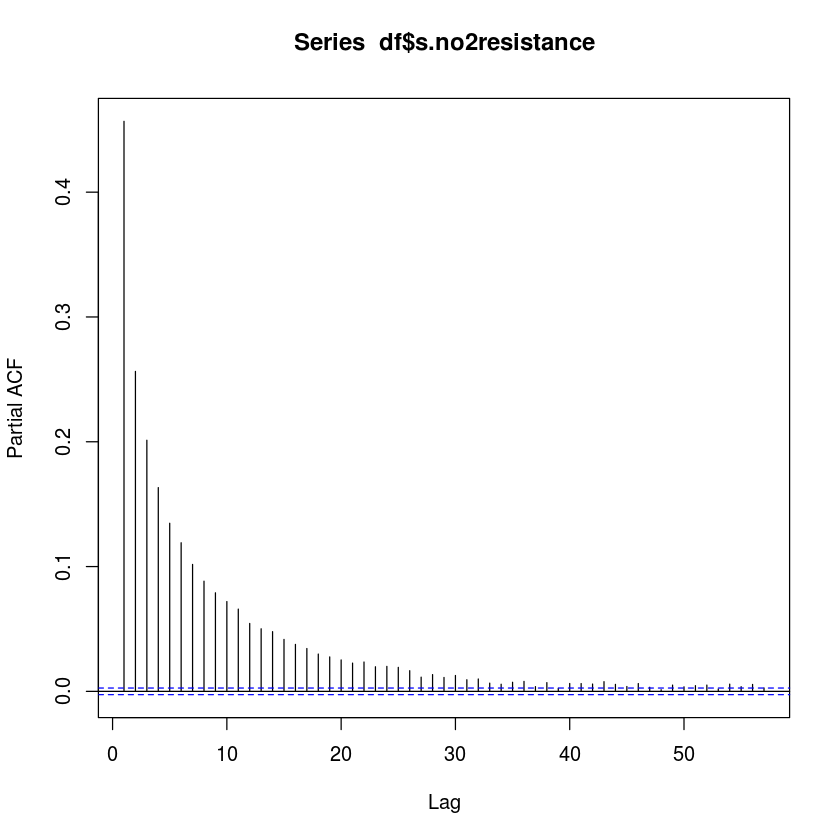

In [91]:
pacf(df$s.no2resistance)

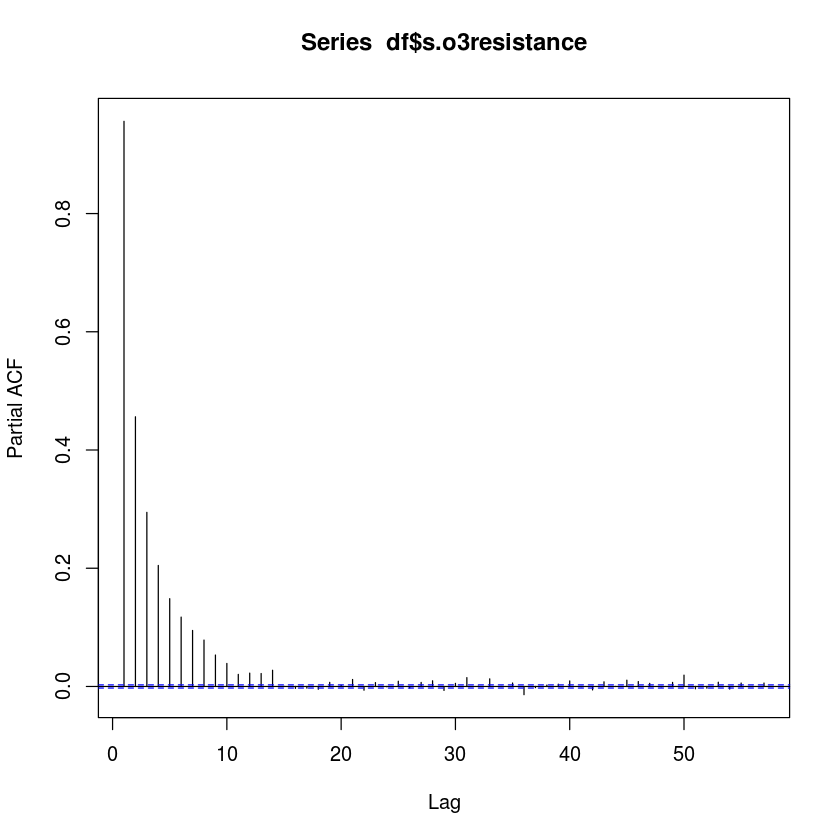

In [75]:
pacf(df$s.o3resistance)

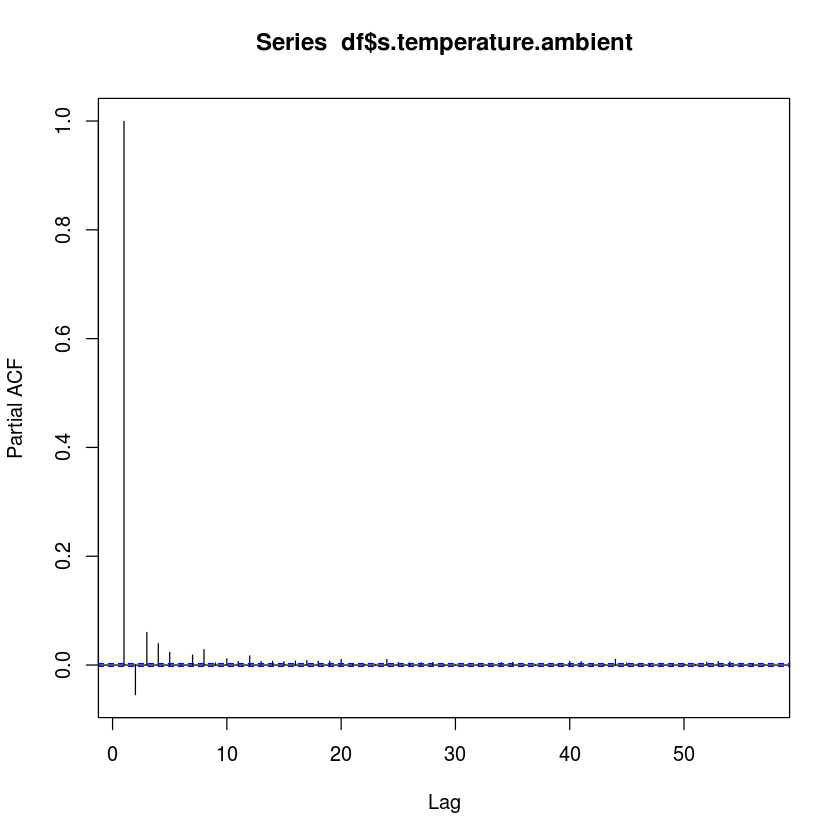

In [70]:
pacf(df$s.temperature.ambient)

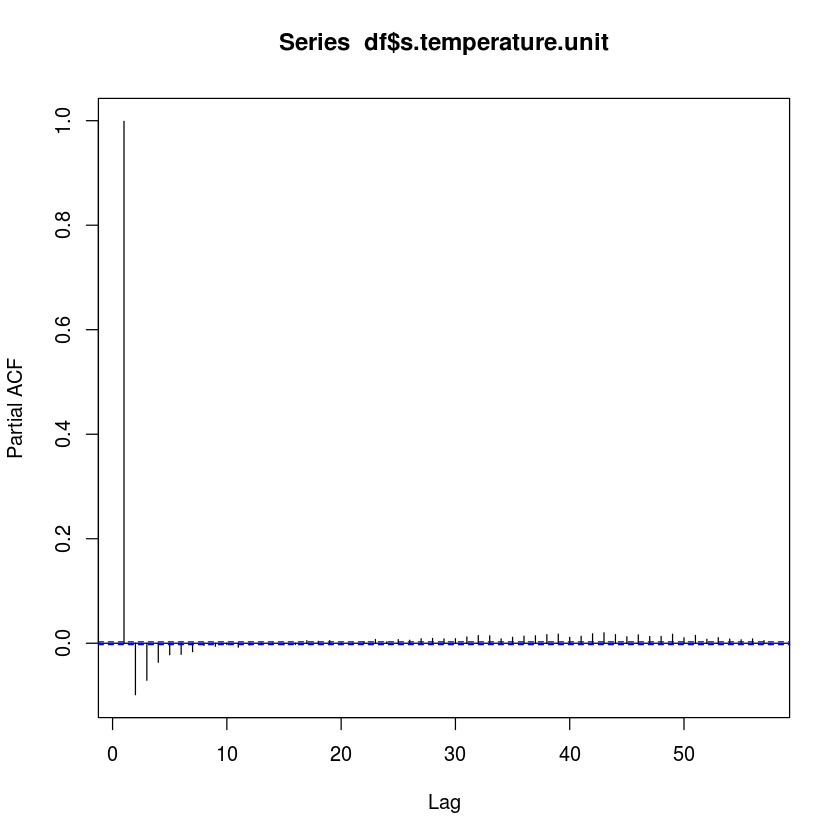

In [71]:
pacf(df$s.temperature.unit)